# ЗАЧЕТ

Мой срез находится в репрезитории по ссылке https://github.com/kotey133/Slava/blob/main/%D0%A1%D0%A0%D0%95%D0%97%20%D0%A1%D0%95%D0%9C%D0%98%D0%9D%D0%90%D0%A01111.ipynb

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/californigaHousingPrice.csv')

df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Переменные датасета californigaHousingPrice:
 1. longitude - долгота
 2. latitude - широта
 3. housing_median_age - медианный возраст жилого помещения
 4. total_rooms - количество комнат в помещении или доме
 5. total_bedrooms - количество спален в помещении или доме
 6. population - общее население в определенном районе
 7. households - количество домохозяйств в определенном районе
 8. median_income - медианный доход жителей в определенном районе
 9. median_house_value - медианная стоимость жилья в определенном районе
 10. ocean_proximity - близость района океана

# 2. Написать спецификацию регрессии содержащую бинарную переменную

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/californigaHousingPrice.csv')

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


ocean_proximity_columns = df.columns[df.columns.str.startswith('ocean_proximity_')]

X = df[ocean_proximity_columns].values  
y = df['median_house_value'].values

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficient = model.coef_
print('Intercept:', intercept)
print('Coefficient:', coefficient)

Intercept: 240084.285464098
Coefficient: [-115278.89346288  140355.7145359    19128.02632629    9349.69196254]


# 3. Постройте два графика линии тренда для двух различных наборов значений: бинарная переменная равна 0/1.

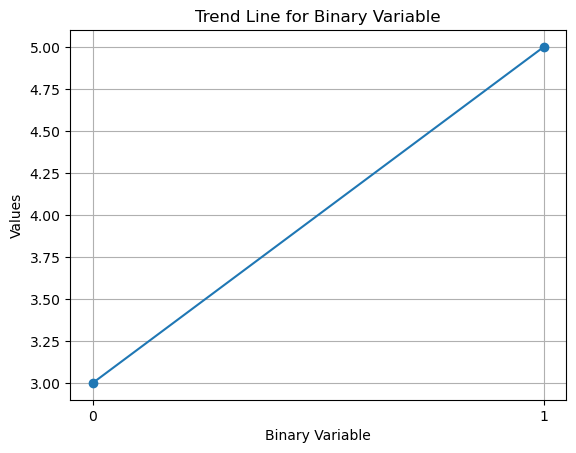

In [6]:
x = np.array([0, 1])  
y = np.array([3, 5])  

plt.plot(x, y, marker='o')
plt.xlabel('Binary Variable')
plt.ylabel('Values')
plt.title('Trend Line for Binary Variable')
plt.xticks([0, 1], ['0', '1'])  
plt.grid(True)
plt.show()


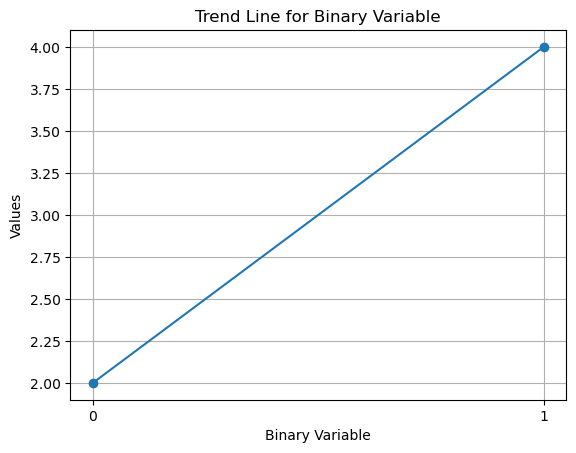

In [7]:
x = np.array([0, 1])  
y = np.array([2, 4])  

plt.plot(x, y, marker='o')
plt.xlabel('Binary Variable')
plt.ylabel('Values')
plt.title('Trend Line for Binary Variable')
plt.xticks([0, 1], ['0', '1'])  
plt.grid(True)
plt.show()


# 4. Измените спецификацию, проинтерпретируйте результаты


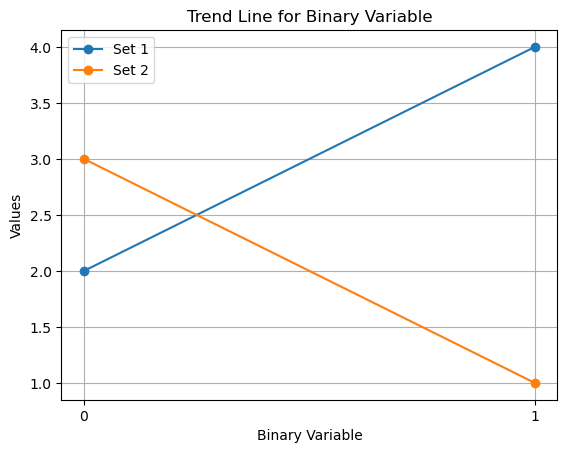

In [8]:
x1 = np.array([0, 1])  
y1 = np.array([2, 4])  

x2 = np.array([0, 1])  
y2 = np.array([3, 1])  

plt.plot(x1, y1, marker='o', label='Set 1')
plt.plot(x2, y2, marker='o', label='Set 2')
plt.xlabel('Binary Variable')
plt.ylabel('Values')
plt.title('Trend Line for Binary Variable')
plt.xticks([0, 1], ['0', '1']) 
plt.legend()
plt.grid(True)
plt.show()


# 5. С помощью p-value определите значимые коэффиценты для уровней значимости (альфа = 0.01)

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/californigaHousingPrice.csv')

df = df.dropna()

df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

X = df.drop('median_house_value', axis=1)
X = sm.add_constant(X)  
y = df['median_house_value']


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        11:46:01   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# 6. Дайте интерпритацию значимым коэффициентам

In [10]:
alpha = 0.01

X = df[['ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND']]
X = sm.add_constant(X)
y = df['median_house_value']

model = sm.OLS(y, X)
results = model.fit()

significant_coeffs = results.pvalues[results.pvalues < alpha]

for coeff_name, p_value in significant_coeffs.items():
    coefficient = results.params[coeff_name]
    print(f"Коэффициент: {coeff_name}")
    print(f"Значение коэффициента: {coefficient:.4f}")
    print(f"p-значение: {p_value:.4f}")
    
    if coeff_name == 'ocean_proximity_NEAR BAY':
        print("Интерпретация: Коэффициент 'ocean_proximity_NEAR BAY' указывает на разницу между домами, расположенными на берегу залива и другими областями. Положительное значение коэффициента означает, что дома, расположенные рядом с заливом, имеют более высокую медианную стоимость по сравнению с другими областями, контролируя другие факторы.")
    
    if coeff_name == 'ocean_proximity_NEAR OCEAN':
        print("Интерпретация: Коэффициент 'ocean_proximity_NEAR OCEAN' указывает на разницу между домами, расположенными рядом с океаном и другими областями. Положительное значение коэффициента означает, что дома, расположенные рядом с океаном, имеют более высокую медианную стоимость по сравнению с другими областями, контролируя другие факторы.")
    
    if coeff_name == 'ocean_proximity_INLAND':
        print("Интерпретация: Коэффициент 'ocean_proximity_INLAND' указывает на разницу между домами, расположенными внутри страны и другими областями. Отрицательное значение коэффициента означает, что дома, расположенные внутри страны, имеют более низкую медианную стоимость по сравнению с другими областями, контролируя другие факторы.")

    print("-------------------------------------")


Коэффициент: const
Значение коэффициента: 240345.5282
p-значение: 0.0000
-------------------------------------
Коэффициент: ocean_proximity_NEAR BAY
Значение коэффициента: 18933.7639
p-значение: 0.0000
Интерпретация: Коэффициент 'ocean_proximity_NEAR BAY' указывает на разницу между домами, расположенными на берегу залива и другими областями. Положительное значение коэффициента означает, что дома, расположенные рядом с заливом, имеют более высокую медианную стоимость по сравнению с другими областями, контролируя другие факторы.
-------------------------------------
Коэффициент: ocean_proximity_NEAR OCEAN
Значение коэффициента: 8696.8269
p-значение: 0.0001
Интерпретация: Коэффициент 'ocean_proximity_NEAR OCEAN' указывает на разницу между домами, расположенными рядом с океаном и другими областями. Положительное значение коэффициента означает, что дома, расположенные рядом с океаном, имеют более высокую медианную стоимость по сравнению с другими областями, контролируя другие факторы.
-----

# 7. Вычислите 3 любых прогнозируемых значения

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/californigaHousingPrice.csv')
total_rooms = df['total_rooms'].mean()
population = df['population'].mean()
ocean_proximity_inland = 1

X_pred = np.array([[total_rooms, population, ocean_proximity_inland]])

X_pred = np.concatenate((np.ones((X_pred.shape[0], 1)), X_pred), axis=1)

y_pred = np.dot(X_pred, results.params)

print()
for i in range(len(y_pred)):
    print(i+1, y_pred[i])



1 9593953.027218856


Прогнозные значения медианной стоимости жилья:
    Прогноз 1 : 62426937.228593044

# 8. Вычислите коэффициент детерминации регрессии и стандартную ошибку регресии.

In [15]:
r_squared = results.rsquared
standard_error = np.sqrt(results.scale)

print(r_squared)
print(standard_error)


0.23759510148275387
100800.9770795576


Коэффициент детерминации (R-квадрат) : 0.23759510148275387
Стандартная ошибка регрессии: 100800.9770795576

# 9. Вычислите исправленный коэффициент детермиинации.

In [16]:
adjusted_r_squared = results.rsquared_adj

print(adjusted_r_squared)

0.23748314227302492


Исправленный коэф деьтерминации равен = 0.23748314227302492